<img width="1347" height="392" alt="image" src="https://github.com/user-attachments/assets/df0f71b5-7bae-4751-a85c-92f9cfbf61af" />
<a href="https://github.com/WilmaDarc/volta-zero-/tree/main">

**Profissão: Cientista de Dados**

**Módulo 34 | Regressão III | Exercício**


**Aluna:[Wilma Darc Alves de Farias](www.linkedin.com/in/wilma-farias-66a15962)<br>** 
**Data: 26 de dezembro de 2025.**

# Regressão III - Tarefa

In [68]:
# Importando bibliotecas necessárias
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
from scipy.interpolate         import interp1d
from sklearn.metrics           import r2_score
import warnings

In [23]:
# Lendo o arquivo CSV 
df = pd.read_csv(r"C:\EBAC CIENCIA DE DADOS\M34\previsao_de_renda.csv", index_col=0, encoding='utf-8')
# Exibindo informações sobre o DataFrame
df.info()

# Exibindo o DataFrame completo
df

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [24]:
# Imprimindo a quantidade de valores ausentes para cada variável no DataFrame
print(f'Quantidade de valores missing por variável:\n\n{df.isna().sum()}')

Quantidade de valores missing por variável:

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


In [25]:
# Criando uma nova variável 'tempo_emprego_fillna_mean' com valores ausentes preenchidos pela média da variável original 'tempo_emprego'
df['tempo_emprego_fillna_mean'] = df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean())

# Imprimindo a quantidade de valores ausentes após o preenchimento pela média
print(f'''Nova variável 'tempo_emprego_fillna_mean' com os valores missing preenchidos pela média:

{df.isna().sum()}
''')

Nova variável 'tempo_emprego_fillna_mean' com os valores missing preenchidos pela média:

index                             0
sexo                              0
posse_de_veiculo                  0
posse_de_imovel                   0
qtd_filhos                        0
tipo_renda                        0
educacao                          0
estado_civil                      0
tipo_residencia                   0
idade                             0
tempo_emprego                125760
qt_pessoas_residencia             0
renda                             0
tempo_emprego_fillna_mean         0
dtype: int64



In [26]:
# Adicionando uma nova coluna 'renda_log' com o logaritmo natural dos valores da coluna 'renda'
df['renda_log'] = np.log(df['renda'])

# Reordenando as colunas do DataFrame
df = df[['index', 
         'sexo', 
         'posse_de_veiculo', 
         'posse_de_imovel', 
         'qtd_filhos', 
         'tipo_renda', 
         'educacao', 
         'estado_civil', 
         'tipo_residencia', 
         'idade', 
         'tempo_emprego', 
         'tempo_emprego_fillna_mean', 
         'qt_pessoas_residencia', 
         'renda', 
         'renda_log']]
df


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,8.665753,3.0,2930.40,7.982894
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,7.746165,2.0,4084.37,8.314923
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,10.969863,2.0,4339.66,8.375551


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [27]:
# Convertendo o índice do DataFrame para o tipo datetime
df.index = pd.to_datetime(df.index)

# Imprimindo os meses presentes na base de dados
print(f'''Meses presentes na base:
{[mes for mes in df.index.unique().strftime('%b%y')]}

Três últimos meses na base:
{[mes for mes in df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].index.unique().strftime('%b%y')]}
''')

Meses presentes na base:
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'Mar16']

Três últimos meses na base:
['Jan16', 'Feb16', 'Mar16']



In [28]:
# Criando um DataFrame de holdout (df_holdout) contendo apenas os dados dos últimos três meses da base de dados original
df_holdout = df[df.index > (df.index.unique().max() - pd.DateOffset(months=3))].copy()

# Imprimindo os meses presentes na base de holdout (df_holdout)
print(f'''Base holdout (df_holdout):
{[mes for mes in df_holdout.index.unique().strftime('%b%y')]}
''')

# Exibindo o DataFrame de holdout
df_holdout

Base holdout (df_holdout):
['Jan16', 'Feb16', 'Mar16']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,NaN,7.746165,2.0,2137.61,7.667444
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,9.301370,4.0,13884.35,9.538518
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,10.967123,5.0,11042.47,9.309504
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.553425,5.0,1333.82,7.195802
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,9.265753,1.0,17633.03,9.777529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,8.665753,3.0,2930.40,7.982894
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,7.746165,2.0,4084.37,8.314923
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,10.969863,2.0,4339.66,8.375551


In [29]:
# Criando um DataFrame de treino (df_train) que contém os dados da base original excluindo os últimos três meses utilizados para o holdout
df_train = df[~df.index.isin(df_holdout.index)].copy()

# Imprimindo os meses presentes na base de treino (df_train)
print(f'''Base de treino (df_train):
{[mes for mes in df_train.index.unique().strftime('%b%y')]}
''')

# Exibindo o DataFrame de treino
df_train

Base de treino (df_train):
['Jan15', 'Feb15', 'Mar15', 'Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15']



,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log
data_ref,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [30]:
# Ajustando um modelo de regressão linear simples utilizando a biblioteca StatsModels
modelo1 = smf.ols(formula='renda_log ~ tempo_emprego_fillna_mean', 
                  data=df_train).fit()

# Imprimindo o R-quadrado ajustado do modelo
print(f'R-quadrado ajustado: {modelo1.rsquared_adj:.2%}')

# Exibindo um resumo do modelo
modelo1.summary()

R-quadrado ajustado: 41.74%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 4.298e+05
Date:                Fri, 26 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:35:38   Log-Likelihood:            -8.0817e+05
No. Observations:              600000   AIC:                         1.616e+06
Df Residuals:                  599998   BIC:                         1.616e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     8.2780      0.002   4262.716      0.000       8.274       8.282
tempo_emprego_fillna_mean     0.1292      0.000    655.629      0.000       0.129       0.130
==============================================================================
Omnibus:                      798.953   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.227
Skew:                          -0.046   Prob(JB):                    1.80e-156
Kurtosis:                       2.857   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [71]:
# Definindo o número inicial de quantis 
warnings.filterwarnings("ignore")
n_quantis = 20

# Inicializando a variável de quantis
quantis = n_quantis

# Enquanto o número de intervalos únicos dos quantis calculados for menor que o número desejado, aumenta-se o número de quantis
while pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop').nunique() < n_quantis:
    quantis += 1

# Criando uma nova coluna 'cat_tempo_emprego' que representa os intervalos de quantis para a variável 'tempo_emprego'
df_train['cat_tempo_emprego'] = pd.qcut(x=df_train['tempo_emprego'], q=quantis, duplicates='drop', precision=0)

# Calculando estatísticas resumidas para cada grupo de 'cat_tempo_emprego'
df_cat = (df_train
          .groupby(by='cat_tempo_emprego')
          .agg({'cat_tempo_emprego': [('Quantidade de observações', 'count')], 
                'renda_log': [('Média do log-renda', 'mean')], 
                'tempo_emprego': [('Média do tempo de emprego', 'mean')]})
          .droplevel(level=0, axis=1))

# Exibindo as estatísticas resumidas
df_cat


,Quantidade de observações,Média do log-renda,Média do tempo de emprego
cat_tempo_emprego,,,
"(0.0, 0.7]",25154,8.370907,0.464057
"(0.7, 1.2]",25038,8.417388,0.971487
"(1.2, 1.8]",24888,8.531471,1.502835
"(1.8, 2.4]",24789,8.561743,2.055728
"(2.4, 3.0]",25155,8.675957,2.715994
"(3.0, 3.6]",24822,8.754188,3.355636
"(3.6, 4.2]",24931,8.849051,3.924755
"(4.2, 4.7]",25158,8.912516,4.449669
"(4.7, 5.4]",24755,8.949442,5.004796


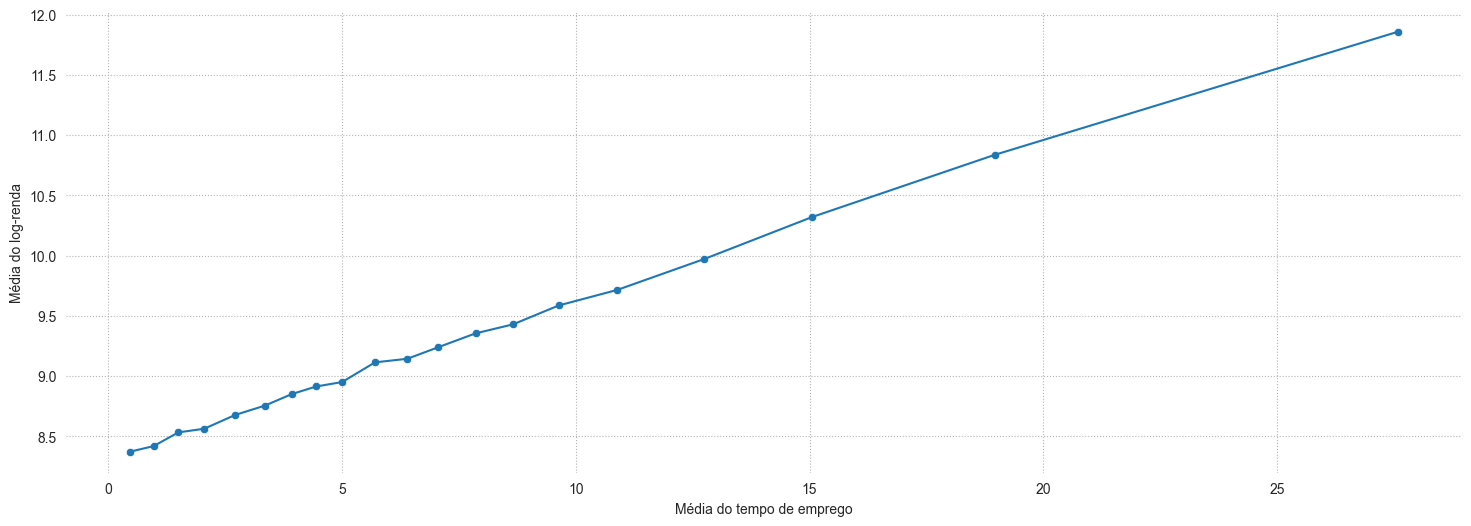

In [32]:
# Configurando o estilo do gráfico com grade branca e estilo de linha pontilhada
sns.set_style("whitegrid", {"grid.color": '.7', "grid.linestyle": ':'})

# Criando uma figura com o tamanho especificado
plt.figure(figsize=(18,6))

# Plotando o gráfico de dispersão
sns.scatterplot(x='Média do tempo de emprego', y='Média do log-renda', data=df_cat)

# Adicionando uma linha de tendência ao gráfico
sns.lineplot(x='Média do tempo de emprego', y='Média do log-renda', data=df_cat)

# Removendo as linhas de grade à esquerda e na parte inferior do gráfico
sns.despine(left=True, bottom=True)

# Exibindo o gráfico
plt.show()

>Preliminarmente, ao ana o gráfico, percebe-se rapidamente uma tendência linear constante, sugerindo inicialmente o uso de uma regressão linear simples. Entretanto, é crucial lembrar da transformação logarítmica na variável dependente, que se utilizada originalmente, evidenciaria o crescimento exponencial, como demonstrado pelo espaçamento crescente entre os valores à medida que aumentam. Assim, considera-se que tanto a categorização quanto a transformação logarítmica ou a regressão segmentada podem fornecer resultados satisfatórios. Contudo, o método Lowess pode ser a melhor escolha devido à sua capacidade de se ajustar ao formato exponencial, suavizando a curva de acordo com a necessidade.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


>**Novo ajuste da variável tempo_emprego através da categorização da variável renda**

In [33]:
# Criando uma nova coluna 'cat_renda' no DataFrame de treino, contendo os dados da variável 'renda' divididos em categorias com base nos quantis
df_train['cat_renda'], retbins = pd.qcut(x=df_train.renda, q=20, retbins=True, precision=0)

# Imprimindo o número de categorias únicas criadas para 'cat_renda'
print(f'''Quantidade de categorias para 'cat_renda': {df_train.cat_renda.nunique()}''')

# Exibindo o DataFrame de treino atualizado
df_train

Quantidade de categorias para 'cat_renda': 20


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log,cat_tempo_emprego,cat_renda
data_ref,,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131,"(16.5, 21.5]","(9966.0, 11497.0]"
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508,"(9.1, 10.2]","(1689.0, 2449.0]"
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769,"(7.5, 8.2]","(13339.0, 15536.0]"
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196,"(1.2, 1.8]","(1689.0, 2449.0]"
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020,"(1.2, 1.8]","(140.0, 1689.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103,"(4.2, 4.7]","(1689.0, 2449.0]"
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841,"(1.8, 2.4]","(2449.0, 3163.0]"
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095,"(0.7, 1.2]","(4671.0, 5519.0]"


In [70]:
# Criando um novo DataFrame df_cat2 com estatísticas resumidas para cada categoria da variável 'cat_renda
warnings.filterwarnings("ignore")
df_cat2 = (df_train
           .groupby(by='cat_renda')
           .agg({'cat_renda':[('Quantidade de observações', 'count')], 
                 'tempo_emprego': [('Média do tempo de emprego', 'mean')], 
                 'renda_log': [('Média do renda_log', 'mean')]})
           .droplevel(level=0, axis=1))

# Exibindo o DataFrame df_cat2
df_cat2

,Quantidade de observações,Média do tempo de emprego,Média do renda_log
cat_renda,,,
"(140.0, 1689.0]",30000,2.828320,7.010163
"(1689.0, 2449.0]",30003,3.468372,7.632577
"(2449.0, 3163.0]",29998,3.931181,7.936228
"(3163.0, 3891.0]",30004,4.253151,8.165258
"(3891.0, 4671.0]",30002,4.589883,8.359802
"(4671.0, 5519.0]",29998,4.807133,8.533222
"(5519.0, 6458.0]",29998,5.104199,8.695236
"(6458.0, 7488.0]",29999,5.371974,8.846803
"(7488.0, 8648.0]",29998,5.665605,8.992746


In [35]:
# Preenchendo os valores ausentes da coluna 'tempo_emprego' no DataFrame de treino com a média do tempo de emprego correspondente à categoria da variável 'cat_renda'
df_train['tempo_emprego_fillna_2'] = (df_train['tempo_emprego']
                                      .fillna(value=df_train.merge(right=df_cat2, 
                                                                   how='left', 
                                                                   left_on='cat_renda', 
                                                                   right_index=True)['Média do tempo de emprego']))

# Exibindo o DataFrame de treino atualizado
df_train

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,tempo_emprego_fillna_mean,qt_pessoas_residencia,renda,renda_log,cat_tempo_emprego,cat_renda,tempo_emprego_fillna_2
data_ref,,,,,,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,16.717808,2.0,11138.14,9.318131,"(16.5, 21.5]","(9966.0, 11497.0]",16.717808
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,9.600000,2.0,2424.81,7.793508,"(9.1, 10.2]","(1689.0, 2449.0]",9.600000
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,8.208219,2.0,13749.66,9.528769,"(7.5, 8.2]","(13339.0, 15536.0]",8.208219
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,1.301370,4.0,2361.84,7.767196,"(1.2, 1.8]","(1689.0, 2449.0]",1.301370
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,1.254795,4.0,790.78,6.673020,"(1.2, 1.8]","(140.0, 1689.0]",1.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,4.441096,2.0,1893.35,7.546103,"(4.2, 4.7]","(1689.0, 2449.0]",4.441096
2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.345205,2.0,3080.48,8.032841,"(1.8, 2.4]","(2449.0, 3163.0]",2.345205
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,0.736986,2.0,5131.20,8.543095,"(0.7, 1.2]","(4671.0, 5519.0]",0.736986


In [36]:
# Ajustando um novo modelo de regressão linear utilizando a variável 'tempo_emprego_fillna_2' como preditor da variável 'renda_log' no DataFrame de treino
modelo2 = smf.ols(formula='renda_log ~ tempo_emprego_fillna_2', data=df_train).fit()

# Imprimindo o R-quadrado ajustado dos dois modelos
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 

# Exibindo um resumo do segundo modelo
modelo2.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                 5.445e+05
Date:                Fri, 26 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:39:12   Log-Likelihood:            -7.7650e+05
No. Observations:              600000   AIC:                         1.553e+06
Df Residuals:                  599998   BIC:                         1.553e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.2620      0.002   4621.417      0.000       8.258       8.265
tempo_emprego_fillna_2     0.1355      0.000    737.887      0.000       0.135       0.136
==============================================================================
Omnibus:                      237.546   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.016
Skew:                          -0.048   Prob(JB):                     2.07e-52
Kurtosis:                       3.022   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Ajustando um terceiro modelo de regressão linear utilizando os dados resumidos do DataFrame df_cat2
modelo3 = smf.ols(formula='Q("Média do renda_log") ~ Q("Média do tempo de emprego")', data=df_cat2).fit()

# Imprimindo o R-quadrado ajustado dos três modelos
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 

# Exibindo um resumo do terceiro modelo
modelo3.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Q("Média do renda_log")   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.850
Method:                      Least Squares   F-statistic:                     108.5
Date:                     Fri, 26 Dec 2025   Prob (F-statistic):           4.76e-09
Time:                             20:39:32   Log-Likelihood:                -12.608
No. Observations:                       20   AIC:                             29.22
Df Residuals:                           18   BIC:                             31.21
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.4269      0.208     35.782      0.000       6.991       7.863
Q("Média do tempo de emprego")     0.2468      0.024     10.414      0.000       0.197       0.297
==============================================================================
Omnibus:                        4.815   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.484
Skew:                          -1.022   Prob(JB):                        0.175
Kurtosis:                       3.006   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Combinando os resultados do modelo de regressão linear (modelo3) com as estatísticas resumidas do DataFrame df_cat2
df_modelo3 = (df_cat2
              .merge(right=modelo3.get_prediction().summary_frame(), 
                     on='cat_renda')
              .rename(columns={'Quantidade de observações':'qtd', 
                               'Média do tempo de emprego':'tempo_emprego', 
                               'Média do renda_log':'renda_log'}))

# Exibindo o DataFrame df_modelo3
df_modelo3

,qtd,tempo_emprego,renda_log,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
cat_renda,,,,,,,,,
"(140.0, 1689.0]",30000,2.828320,7.010163,8.124859,0.154094,7.801120,8.448599,7.067555,9.182163
"(1689.0, 2449.0]",30003,3.468372,7.632577,8.282803,0.143580,7.981152,8.584454,7.232052,9.333553
"(2449.0, 3163.0]",29998,3.931181,7.936228,8.397009,0.136524,8.110183,8.683835,7.350418,9.443600
"(3163.0, 3891.0]",30004,4.253151,8.165258,8.476461,0.131931,8.199285,8.753636,7.432473,9.520448
"(3891.0, 4671.0]",30002,4.589883,8.359802,8.559555,0.127438,8.291817,8.827293,7.518033,9.601076
"(4671.0, 5519.0]",29998,4.807133,8.533222,8.613165,0.124725,8.351127,8.875203,7.573094,9.653236
"(5519.0, 6458.0]",29998,5.104199,8.695236,8.686471,0.121271,8.431690,8.941252,7.648205,9.724738
"(6458.0, 7488.0]",29999,5.371974,8.846803,8.752549,0.118430,8.503737,9.001362,7.715731,9.789367
"(7488.0, 8648.0]",29998,5.665605,8.992746,8.825008,0.115635,8.582067,9.067948,7.789583,9.860432


In [40]:
# Criando uma função para plotar os resultados de um modelo de regressão
def plotar_resultados_regressao(data: pd.DataFrame) -> None:
    """
    Plota os dados observados, a média prevista e os intervalos de confiança de um modelo de regressão.

    Parâmetros:
        data (pd.DataFrame): DataFrame contendo os resultados da regressão.

    Retorna:
        None
    """
    # Criação do gráfico para exibir os resultados do modelo de regressão linear
    plt.figure(figsize=(18, 6))

    # Configurando o estilo do gráfico
    sns.set_theme(style='white')

    # Plotando os dados observados
    plt.plot(data['tempo_emprego'], data['renda_log'], 'bo', alpha=.9, label='Dados observados')
    
    # Plotando uma linha conectando os dados observados
    plt.plot(data['tempo_emprego'], data['renda_log'], '-', alpha=.3)

    # Plotando a média prevista
    plt.plot(data['tempo_emprego'], data['mean'], 'g-.', label='Média prevista')

    # Plotando o intervalo de confiança da média
    plt.plot(data['tempo_emprego'], data['mean_ci_lower'], ':', color='orange', label='Intervalo de confiança da média')
    plt.plot(data['tempo_emprego'], data['mean_ci_upper'], ':', color='orange')

    # Plotando o intervalo de confiança para a variável de resposta
    plt.plot(data['tempo_emprego'], data['obs_ci_lower'], 'r--', label='Intervalo de confiança para a variável de resposta')
    plt.plot(data['tempo_emprego'], data['obs_ci_upper'], 'r--')

    # Adicionando legenda
    plt.legend(loc='best')

    # Exibindo o gráfico
    plt.show()

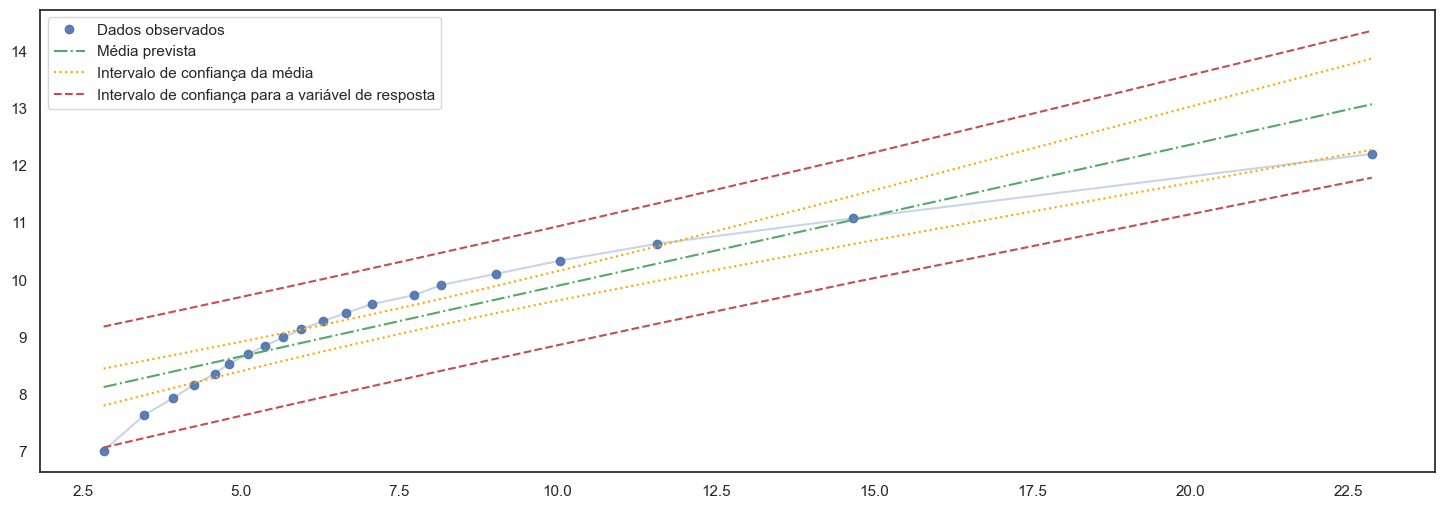

In [41]:
# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo3)
plotar_resultados_regressao(data=df_modelo3)

In [42]:
# Criando um novo DataFrame df_train2 a partir do DataFrame df_cat2
# Selecionando apenas as colunas relevantes (tempo_emprego e renda_log), redefinindo os índices e renomeando as colunas
df_train2 = (df_cat2
             .iloc[:,1:]  # Excluindo a primeira coluna
             .reset_index(drop=True)  # Redefinindo os índices
             .rename(columns={'Média do tempo de emprego':'tempo_emprego', 'Média do renda_log':'renda_log'}))  # Renomeando as colunas

# Exibindo o DataFrame df_train2
df_train2

,tempo_emprego,renda_log
0,2.828320,7.010163
1,3.468372,7.632577
2,3.931181,7.936228
3,4.253151,8.165258
4,4.589883,8.359802
5,4.807133,8.533222
6,5.104199,8.695236
7,5.371974,8.846803
8,5.665605,8.992746
9,5.951053,9.135799


In [43]:
# Dividindo a variável 'tempo_emprego' em 10 categorias usando quantis e retornando os pontos de corte dos intervalos de cada categoria
df_train2['tempo_emprego_cat'], q = pd.qcut(x=df_train2.tempo_emprego, q=10, retbins=True, duplicates='drop')

# Exibindo os pontos de corte dos intervalos de cada categoria
q

array([ 2.82831955,  3.88489973,  4.52253642,  5.01507938,  5.54815254,
        6.1206601 ,  6.82530007,  7.86743048,  9.2254007 , 11.88062575,
       22.86804915])

In [72]:
# Definindo os pontos de corte para dividir a variável 'tempo_emprego' em intervalos
warnings.filterwarnings("ignore")
q = [-np.inf, #2.82831955, 
     3.88489973, 
     4.52253642, 
#      5.01507938, 
     5.54815254, 
#      6.1206601, 
     6.82530007, 
#      7.86743048, 
     9.2254007, 
#      11.88062575, 
     np.inf #22.86804915
    ]

# Criando uma nova coluna 'tempo_emprego_cat' no DataFrame df_train2, contendo os intervalos definidos pelos pontos de corte
df_train2['tempo_emprego_cat'] = pd.cut(x=df_train2.tempo_emprego, bins=q)

# Criando um novo DataFrame df_train3
df_train3 = pd.DataFrame()

# Calculando a média da variável 'renda_log' para cada intervalo da variável 'tempo_emprego_cat'
df_train3['y_mean'] = df_train2.groupby(by='tempo_emprego_cat')['renda_log'].mean()

# Calculando o erro padrão da média da variável 'renda_log' para cada intervalo da variável 'tempo_emprego_cat'
std_error = df_train2.groupby(by='tempo_emprego_cat')['renda_log'].sem()

# Calculando os limites superior e inferior do intervalo de confiança de 95% para a média da variável 'renda_log'
df_train3['y_max'] = df_train3['y_mean'] + std_error * 2
df_train3['y_min'] = df_train3['y_mean'] - std_error * 2

# Combinando os resultados com o DataFrame df_train2
df_train3 = df_train2.merge(right=df_train3, how='left', left_on='tempo_emprego_cat', right_index=True)

# Exibindo o DataFrame df_train3
df_train3

,tempo_emprego,renda_log,tempo_emprego_cat,X_1,X_2,lowess,y_mean,y_max,y_min
0,2.828320,7.010163,"(-inf, 3.885]",2.828320,7.500000,7.237161,7.321370,7.943784,6.698956
1,3.468372,7.632577,"(-inf, 3.885]",3.468372,7.500000,7.647177,7.321370,7.943784,6.698956
2,3.931181,7.936228,"(3.885, 4.523]",3.931181,7.500000,7.940221,8.050743,8.279773,7.821713
3,4.253151,8.165258,"(3.885, 4.523]",4.253151,7.500000,8.142330,8.050743,8.279773,7.821713
4,4.589883,8.359802,"(4.523, 5.548]",4.589883,7.500000,8.351593,8.608765,8.818391,8.399140
5,4.807133,8.533222,"(4.523, 5.548]",4.807133,7.500000,8.484623,8.608765,8.818391,8.399140
6,5.104199,8.695236,"(4.523, 5.548]",5.104199,7.500000,8.654556,8.608765,8.818391,8.399140
7,5.371974,8.846803,"(4.523, 5.548]",5.371974,7.500000,8.798389,8.608765,8.818391,8.399140
8,5.665605,8.992746,"(5.548, 6.825]",5.665605,7.500000,8.955705,9.207335,9.392385,9.022285
9,5.951053,9.135799,"(5.548, 6.825]",5.951053,7.500000,9.092455,9.207335,9.392385,9.022285


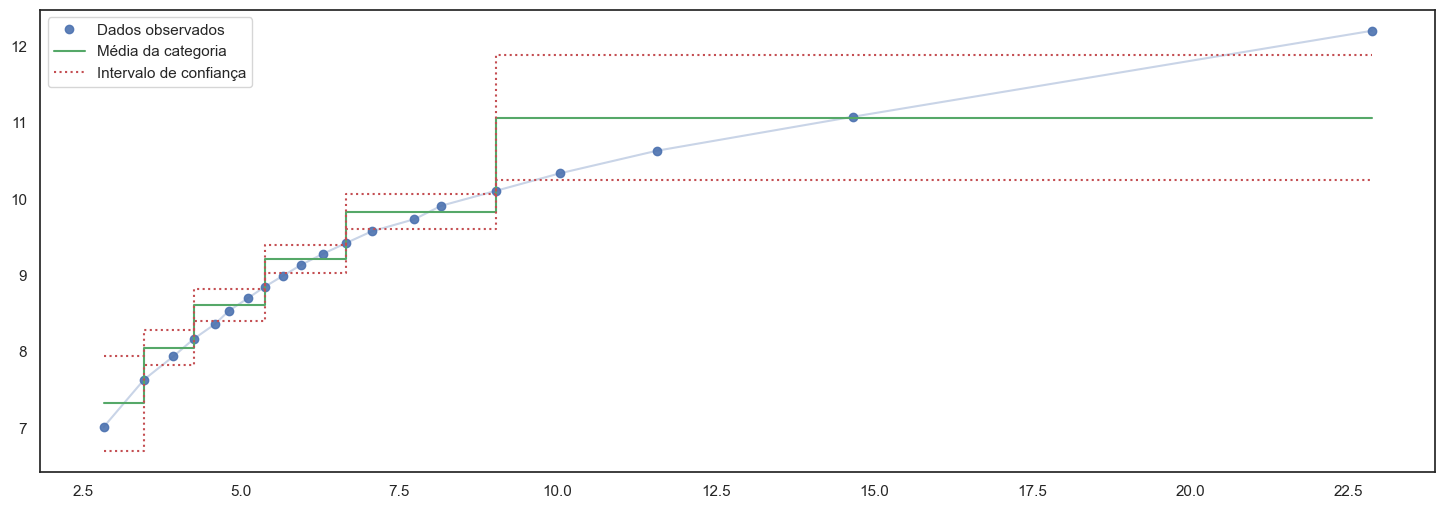

In [45]:
# Criando um gráfico para visualizar os dados observados, a média da categoria e o intervalo de confiança da variável 'renda_log' em relação à variável 'tempo_emprego'
plt.figure(figsize=(18,6))

# Plotando os dados observados
plt.plot(df_train3.tempo_emprego, df_train3.renda_log, 'bo', alpha=.9, label='Dados observados')

# Plotando uma linha conectando os dados observados
plt.plot(df_train3.tempo_emprego, df_train3.renda_log, '-', alpha=.3)

# Plotando a média da categoria
plt.step(df_train3.tempo_emprego, df_train3.y_mean, 'g-', label='Média da categoria')

# Plotando o intervalo de confiança
plt.step(df_train3.tempo_emprego, df_train3.y_max, 'r:', label='Intervalo de confiança')
plt.step(df_train3.tempo_emprego, df_train3.y_min, 'r:')

# Adicionando legenda
plt.legend(loc='best')

# Exibindo o gráfico
plt.show()

In [46]:
# Ajustando um novo modelo de regressão linear usando a variável categórica 'tempo_emprego_cat' como preditora da variável 'renda_log' no DataFrame df_train3
modelo4 = smf.ols(formula='renda_log ~ tempo_emprego_cat', data=df_train3).fit()

# Imprimindo o R-quadrado ajustado dos quatro modelos anteriores
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo4): {modelo4.rsquared_adj:.2%}') 

# Exibindo um resumo completo do quarto modelo
modelo4.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     28.15
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           7.81e-07
Time:                        20:42:28   Log-Likelihood:                -8.0765
No. Observations:                  20   AIC:                             28.15
Df Residuals:                      14   BIC:                             34.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7.3214      0.306     23.906      0.000       6.665       7.978
tempo_emprego_cat[T.Interval(3.885, 4.523, closed='right')]     0.7294      0.433      1.684      0.114      -0.200       1.658
tempo_emprego_cat[T.Interval(4.523, 5.548, closed='right')]     1.2874      0.375      3.432      0.004       0.483       2.092
tempo_emprego_cat[T.Interval(5.548, 6.825, closed='right')]     1.8860      0.375      5.028      0.000       1.082       2.690
tempo_emprego_cat[T.Interval(6.825, 9.225, closed='right')]     2.5087      0.375      6.688      0.000       1.704       3.313
tempo_emprego_cat[T.Interval(9.225, inf, closed='right')]       3.7384      0.375      9.967      0.000       2.934       4.543
==============================================================================
Omnibus:                       11.637   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.097
Skew:                           1.078   Prob(JB):                      0.00389
Kurtosis:                       5.945   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

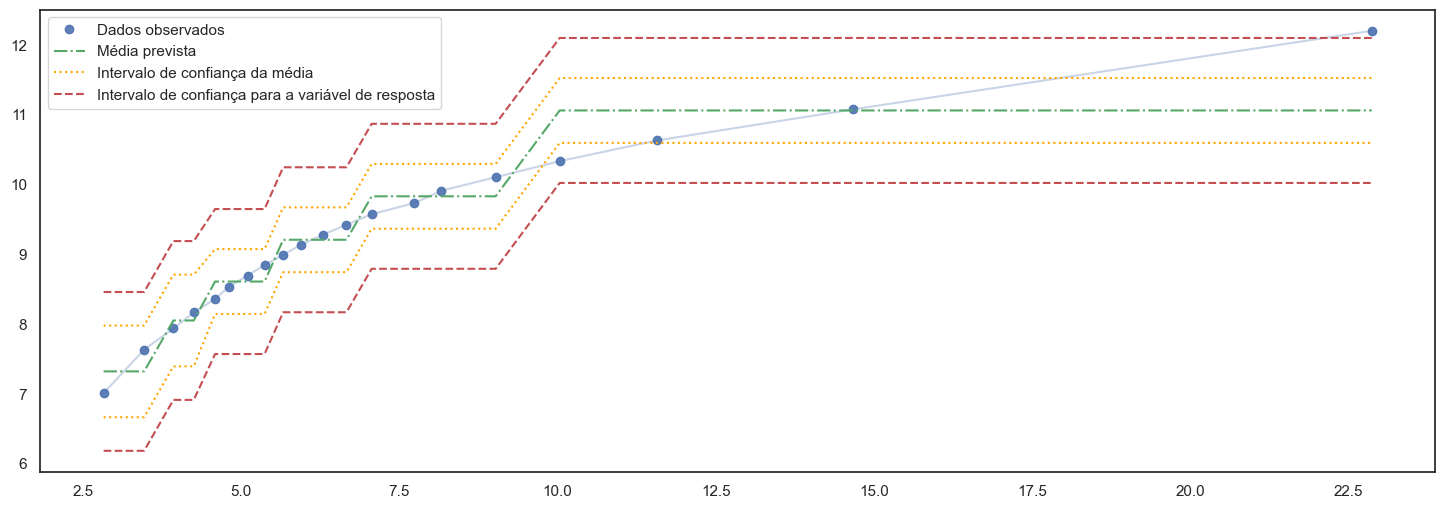

In [47]:
# Concatenando os resultados do modelo de regressão linear (modelo4) com os dados do DataFrame df_train3
df_modelo4 = pd.concat(objs=[df_train3, modelo4.get_prediction().summary_frame()], axis=1)

# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo4)
plotar_resultados_regressao(data=df_modelo4)

**Transformação sobre X**

In [48]:
# Ajustando um novo modelo de regressão linear usando o logaritmo natural da variável 'tempo_emprego' como preditora da variável 'renda_log' no DataFrame df_train2
modelo5 = smf.ols(formula='renda_log ~ I(np.log(tempo_emprego))', data=df_train2).fit()

# Imprimindo o R-quadrado ajustado dos cinco modelos anteriores
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo4): {modelo4.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo5): {modelo5.rsquared_adj:.2%}') 

# Exibindo um resumo completo do quinto modelo
modelo5.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2880.
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           2.56e-21
Time:                        20:43:49   Log-Likelihood:                 18.712
No. Observations:                  20   AIC:                            -33.42
Df Residuals:                      18   BIC:                            -31.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.6737      0.089     52.709      0.000       4.487       4.860
I(np.log(tempo_emprego))     2.4474      0.046     53.669      0.000       2.352       2.543
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.815
Skew:                          -0.662   Prob(JB):                        0.404
Kurtosis:                       2.347   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Combinando os resultados do modelo de regressão linear (modelo5) com as duas primeiras colunas do DataFrame df_train2
df_modelo5 = pd.concat(objs=[df_train2.iloc[:,:2], modelo5.get_prediction().summary_frame().reset_index(drop=True)], axis=1)

# Exibindo o DataFrame df_modelo5
df_modelo5

,tempo_emprego,renda_log,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,7.218149,0.044434,7.124797,7.311501,6.988113,7.448185
1,3.468372,7.632577,7.717420,0.036697,7.640323,7.794518,7.493487,7.941353
2,3.931181,7.936228,8.023966,0.032358,7.955984,8.091947,7.803005,8.244926
3,4.253151,8.165258,8.216624,0.029868,8.153873,8.279376,7.997217,8.436032
4,4.589883,8.359802,8.403101,0.027690,8.344927,8.461274,8.184958,8.621243
5,4.807133,8.533222,8.516283,0.026502,8.460604,8.571963,8.298793,8.733774
6,5.104199,8.695236,8.663035,0.025143,8.610211,8.715859,8.446257,8.879812
7,5.371974,8.846803,8.788174,0.024169,8.737396,8.838952,8.571886,9.004462
8,5.665605,8.992746,8.918419,0.023360,8.869341,8.967498,8.702524,9.134314
9,5.951053,9.135799,9.038719,0.022818,8.990780,9.086658,8.823080,9.254358


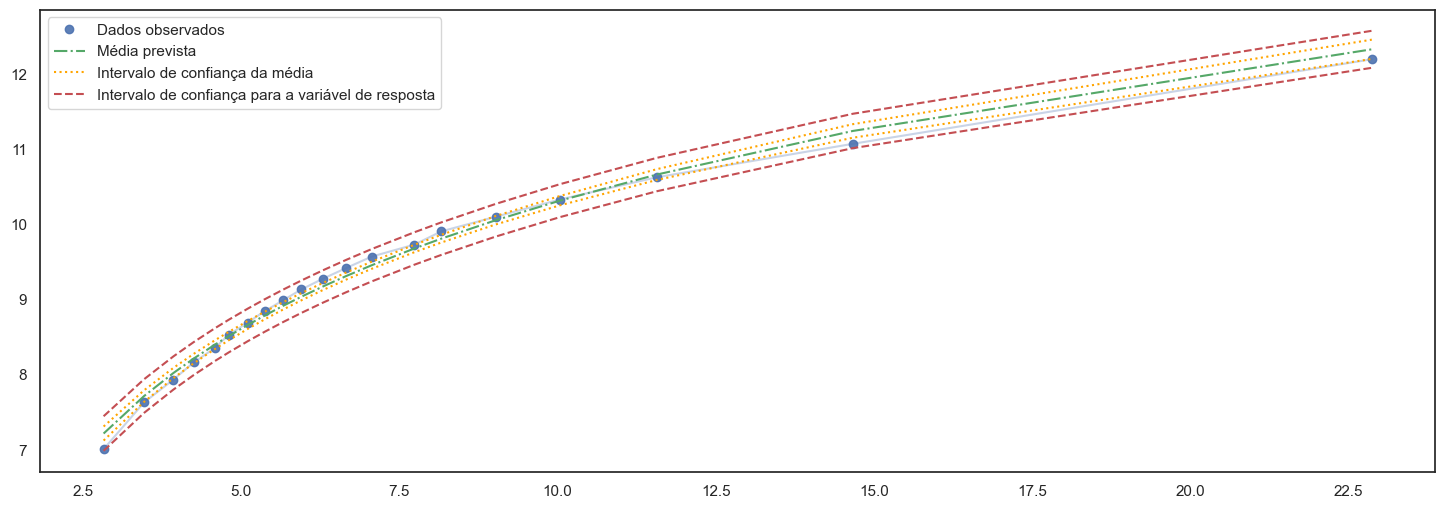

In [50]:
# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo5)
plotar_resultados_regressao(data=df_modelo5)

**Regressão segmentada**

In [51]:
# Definindo um ponto de corte
C1 = 7.5

# Criando duas novas colunas no DataFrame df_train2, X_1 e X_2
# Preenchendo as colunas com valores da variável 'tempo_emprego' de acordo com a seguinte lógica:
# Se o valor da variável 'tempo_emprego' for menor ou igual a C1, o valor é mantido; caso contrário, o valor é substituído por C1
df_train2['X_1'] = (df_train2['tempo_emprego'] <= C1) * df_train2['tempo_emprego'] + (df_train2['tempo_emprego'] > C1) * C1
# X_2 contém os valores originais de 'tempo_emprego' se forem maiores que C1, caso contrário, os valores são substituídos por C1
df_train2['X_2'] = (df_train2['tempo_emprego'] > C1) * df_train2['tempo_emprego'] + (df_train2['tempo_emprego'] <= C1) * C1

# Exibindo o DataFrame df_train2
df_train2

,tempo_emprego,renda_log,tempo_emprego_cat,X_1,X_2
0,2.828320,7.010163,"(-inf, 3.885]",2.828320,7.500000
1,3.468372,7.632577,"(-inf, 3.885]",3.468372,7.500000
2,3.931181,7.936228,"(3.885, 4.523]",3.931181,7.500000
3,4.253151,8.165258,"(3.885, 4.523]",4.253151,7.500000
4,4.589883,8.359802,"(4.523, 5.548]",4.589883,7.500000
5,4.807133,8.533222,"(4.523, 5.548]",4.807133,7.500000
6,5.104199,8.695236,"(4.523, 5.548]",5.104199,7.500000
7,5.371974,8.846803,"(4.523, 5.548]",5.371974,7.500000
8,5.665605,8.992746,"(5.548, 6.825]",5.665605,7.500000
9,5.951053,9.135799,"(5.548, 6.825]",5.951053,7.500000


In [52]:
# Ajustando um novo modelo de regressão linear (modelo6) usando as variáveis 'X_1' e 'X_2' como preditoras da variável 'renda_log' no DataFrame df_train2
modelo6 = smf.ols(formula='renda_log ~ X_1 + X_2', data=df_train2).fit()

# Imprimindo o R-quadrado ajustado dos seis modelos anteriores
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo4): {modelo4.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo5): {modelo5.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo6): {modelo6.rsquared_adj:.2%}') 

# Exibindo um resumo completo do sexto modelo
modelo6.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%
R-quadrado ajustado (modelo6): 99.04%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     983.0
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           2.70e-18
Time:                        20:45:10   Log-Likelihood:                 15.488
No. Observations:                  20   AIC:                            -24.98
Df Residuals:                      17   BIC:                            -21.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5931      0.112     41.190      0.000       4.358       4.828
X_1            0.5583      0.020     27.855      0.000       0.516       0.601
X_2            0.1517      0.008     18.154      0.000       0.134       0.169
==============================================================================
Omnibus:                        7.421   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.062
Skew:                          -1.174   Prob(JB):                       0.0796
Kurtosis:                       3.747   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Combinando os resultados do modelo de regressão linear (modelo6) com as colunas do DataFrame df_train2
df_modelo6 = pd.concat(objs=[df_train2.iloc[:,[0,1,3,4]], modelo6.get_prediction().summary_frame()], axis=1)

# Exibindo o DataFrame df_modelo6
df_modelo6

,tempo_emprego,renda_log,X_1,X_2,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,2.828320,7.500000,7.310198,0.063374,7.176490,7.443905,7.022045,7.598351
1,3.468372,7.632577,3.468372,7.500000,7.667555,0.052361,7.557082,7.778028,7.389421,7.945690
2,3.931181,7.936228,3.931181,7.500000,7.925953,0.045002,7.831008,8.020899,7.653613,8.198293
3,4.253151,8.165258,4.253151,7.500000,8.105717,0.040351,8.020585,8.190850,7.836641,8.374794
4,4.589883,8.359802,4.589883,7.500000,8.293723,0.036085,8.217591,8.369855,8.027358,8.560089
5,4.807133,8.533222,4.807133,7.500000,8.415020,0.033765,8.343782,8.486258,8.150011,8.680028
6,5.104199,8.695236,5.104199,7.500000,8.580879,0.031304,8.514834,8.646924,8.317219,8.844539
7,5.371974,8.846803,5.371974,7.500000,8.730384,0.029938,8.667220,8.793549,8.467431,8.993337
8,5.665605,8.992746,5.665605,7.500000,8.894326,0.029510,8.832066,8.956587,8.631589,9.157064
9,5.951053,9.135799,5.951053,7.500000,9.053699,0.030208,8.989966,9.117432,8.790609,9.316789


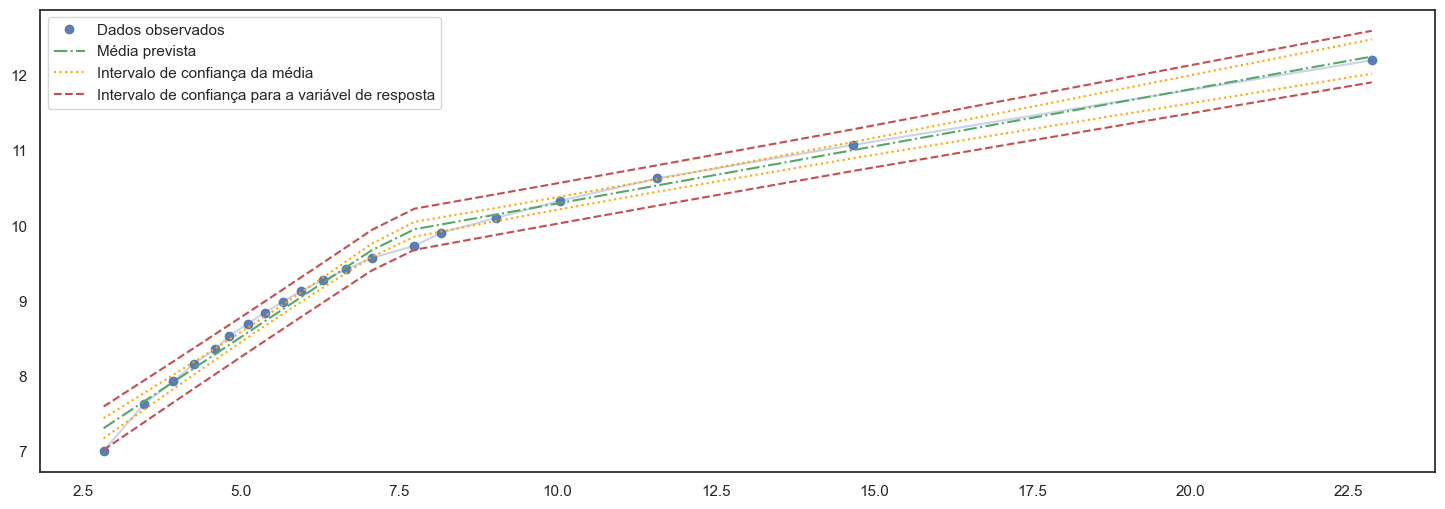

In [54]:
# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo6)
plotar_resultados_regressao(data=df_modelo6)

**Lowess**

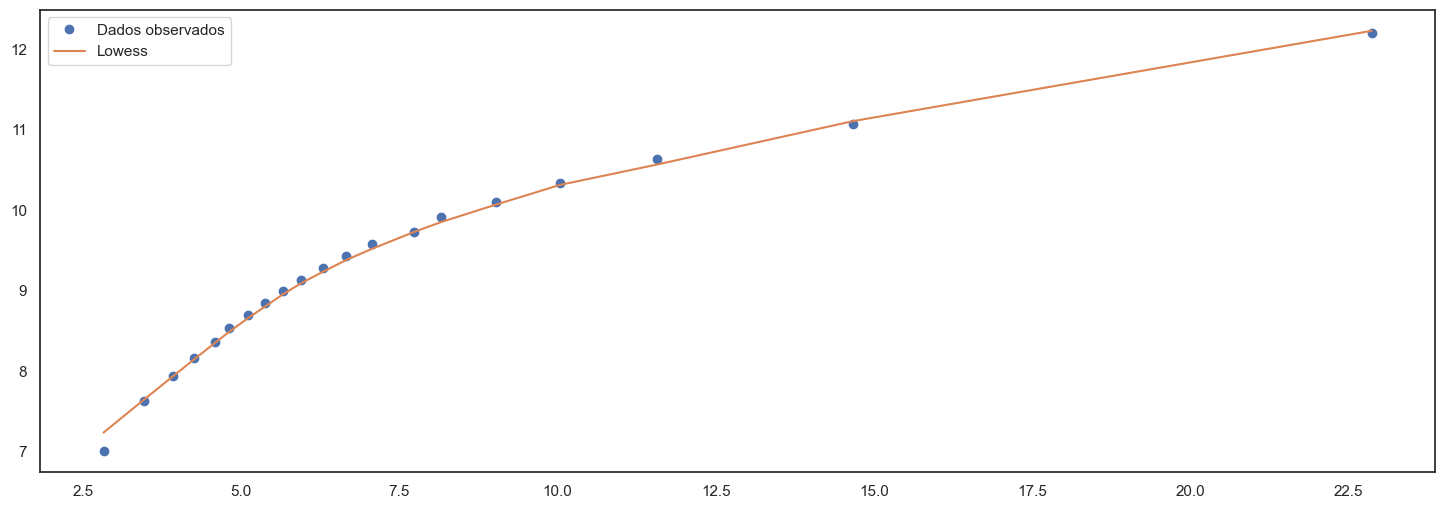

In [55]:
# Aplicando o método LOWESS (Local Regression) para ajustar uma linha suave aos dados de 'renda_log' em relação a 'tempo_emprego' no DataFrame df_train2
lowess = sm.nonparametric.lowess(endog=df_train2['renda_log'], exog=df_train2['tempo_emprego'], frac=2/3)

# Criando um gráfico para visualizar os dados observados e a linha suavizada LOWESS
plt.figure(figsize=(18,6))

# Plotando os dados observados
plt.plot(df_train2['tempo_emprego'], df_train2['renda_log'], 'o', label='Dados observados')

# Plotando a linha suavizada LOWESS
plt.plot(df_train2['tempo_emprego'], lowess[:,1], label='Lowess')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [56]:
# Usando a função interp1d para interpolar os valores suavizados gerados pelo método LOWESS
f = interp1d(x=lowess[:,0], y=lowess[:,1], bounds_error=False)

# Adicionando os valores interpolados como uma nova coluna chamada 'lowess' no DataFrame df_train2
df_train2['lowess'] = f(df_train2['tempo_emprego'])

# Exibindo o DataFrame df_train2 com a nova coluna 'lowess'
df_train2

,tempo_emprego,renda_log,tempo_emprego_cat,X_1,X_2,lowess
0,2.828320,7.010163,"(-inf, 3.885]",2.828320,7.500000,7.237161
1,3.468372,7.632577,"(-inf, 3.885]",3.468372,7.500000,7.647177
2,3.931181,7.936228,"(3.885, 4.523]",3.931181,7.500000,7.940221
3,4.253151,8.165258,"(3.885, 4.523]",4.253151,7.500000,8.142330
4,4.589883,8.359802,"(4.523, 5.548]",4.589883,7.500000,8.351593
5,4.807133,8.533222,"(4.523, 5.548]",4.807133,7.500000,8.484623
6,5.104199,8.695236,"(4.523, 5.548]",5.104199,7.500000,8.654556
7,5.371974,8.846803,"(4.523, 5.548]",5.371974,7.500000,8.798389
8,5.665605,8.992746,"(5.548, 6.825]",5.665605,7.500000,8.955705
9,5.951053,9.135799,"(5.548, 6.825]",5.951053,7.500000,9.092455


In [57]:
# Ajustando um novo modelo de regressão linear (modelo7) usando a variável 'lowess' como preditora da variável 'renda_log' no DataFrame df_train2
modelo7 = smf.ols(formula='renda_log ~ lowess', data=df_train2).fit()

# Imprimindo o R-quadrado ajustado dos sete modelos anteriores
print(f'R-quadrado ajustado (modelo1): {modelo1.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo2): {modelo2.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo3): {modelo3.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo4): {modelo4.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo5): {modelo5.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo6): {modelo6.rsquared_adj:.2%}') 
print(f'R-quadrado ajustado (modelo7): {modelo7.rsquared_adj:.2%}') 

# Exibindo um resumo completo do sétimo modelo
modelo7.summary()

R-quadrado ajustado (modelo1): 41.74%
R-quadrado ajustado (modelo2): 47.57%
R-quadrado ajustado (modelo3): 84.98%
R-quadrado ajustado (modelo4): 87.72%
R-quadrado ajustado (modelo5): 99.34%
R-quadrado ajustado (modelo6): 99.04%
R-quadrado ajustado (modelo7): 99.75%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7457.
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           5.06e-25
Time:                        20:46:37   Log-Likelihood:                 28.186
No. Observations:                  20   AIC:                            -52.37
Df Residuals:                      18   BIC:                            -50.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1228      0.110     -1.119      0.278      -0.353       0.108
lowess         1.0148      0.012     86.352      0.000       0.990       1.039
==============================================================================
Omnibus:                       27.279   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.962
Skew:                          -2.382   Prob(JB):                     2.84e-10
Kurtosis:                       8.482   Cond. No.                         74.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Combinando os resultados do modelo de regressão linear (modelo7) com as colunas do DataFrame df_train2
df_modelo7 = pd.concat(objs=[df_train2.iloc[:,[0,1,5]], modelo7.get_prediction().summary_frame()], axis=1)

# Exibindo o DataFrame df_modelo7
df_modelo7

,tempo_emprego,renda_log,lowess,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.828320,7.010163,7.237161,7.221198,0.027599,7.163214,7.279182,7.078012,7.364383
1,3.468372,7.632577,7.647177,7.637265,0.023566,7.587754,7.686775,7.497296,7.777233
2,3.931181,7.936228,7.940221,7.934634,0.020888,7.890749,7.978519,7.796555,8.072713
3,4.253151,8.165258,8.142330,8.139726,0.019184,8.099421,8.180031,8.002743,8.276709
4,4.589883,8.359802,8.351593,8.352077,0.017585,8.315132,8.389022,8.216045,8.488110
5,4.807133,8.533222,8.484623,8.487071,0.016678,8.452033,8.522109,8.351544,8.622598
6,5.104199,8.695236,8.654556,8.659512,0.015669,8.626592,8.692432,8.524517,8.794507
7,5.371974,8.846803,8.798389,8.805467,0.014972,8.774013,8.836922,8.670822,8.940112
8,5.665605,8.992746,8.955705,8.965106,0.014399,8.934856,8.995357,8.830737,9.099475
9,5.951053,9.135799,9.092455,9.103874,0.014080,9.074293,9.133454,8.969654,9.238093


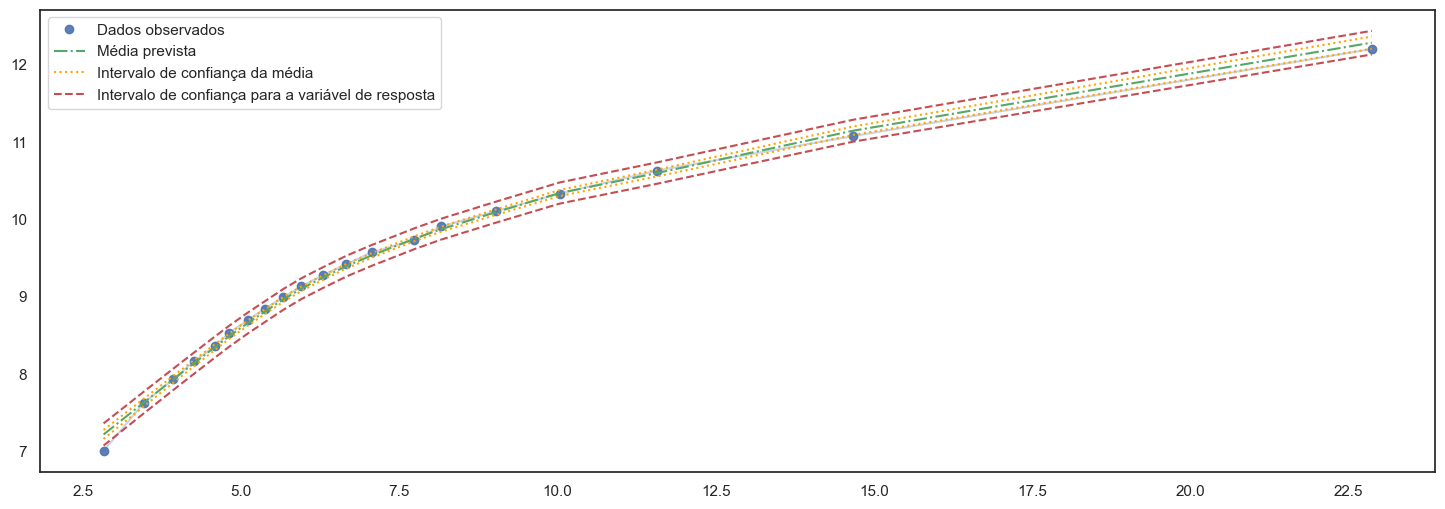

In [59]:
# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (modelo7)
plotar_resultados_regressao(data=df_modelo7)

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

**NOVA BASE REDUZIDA**

In [73]:
# Filtrando apenas as colunas numéricas antes de calcular a média
warnings.filterwarnings("ignore")
colunas_numericas = ['tempo_emprego_fillna_2', 'renda_log']

df_ = (
    df_train
    .groupby(['data_ref', pd.cut(df_train['renda'], bins=retbins)])
    [colunas_numericas]
    .mean()
    .reset_index(level='renda', drop=True)
    .rename(columns={'tempo_emprego_fillna_2': 'tempo_emprego'})
)

df_

,tempo_emprego,renda_log
data_ref,,
2015-01-01,3.165641,6.945560
2015-01-01,4.140064,7.624840
2015-01-01,4.928556,7.930471
2015-01-01,5.392311,8.163630
2015-01-01,5.995652,8.359317
...,...,...
2015-12-01,13.418210,10.096354
2015-12-01,16.156079,10.331155
2015-12-01,18.939010,10.623817


In [62]:
# Dividindo o DataFrame df_ em conjuntos de treinamento e teste com base em datas
df_train_ = df_[df_.index <= df_.index.unique().max() - pd.DateOffset(months=3)].copy()  # Conjunto de treinamento contendo dados até três meses antes da data mais recente
df_test_ = df_[~df_.index.isin(df_train_.index)].copy()  # Conjunto de teste contendo os dados restantes

# Imprimindo informações sobre o tamanho e as datas dos conjuntos de treinamento e teste
print(f'''
Base de treino: {df_train_.shape} - {df_train_.index.unique().strftime('%b%y').values}
Base de teste: {df_test_.shape} - {df_test_.index.unique().strftime('%b%y').values}
''')


Base de treino: (180, 2) - ['Jan15' 'Feb15' 'Mar15' 'Apr15' 'May15' 'Jun15' 'Jul15' 'Aug15' 'Sep15']
Base de teste: (60, 2) - ['Oct15' 'Nov15' 'Dec15']



**CATEGORIZAÇÃO**

CATEGORIZAÇÃO
R-quadrado ajustado do modelo: 72.12%
R-quadrado com dados de teste: 75.50%



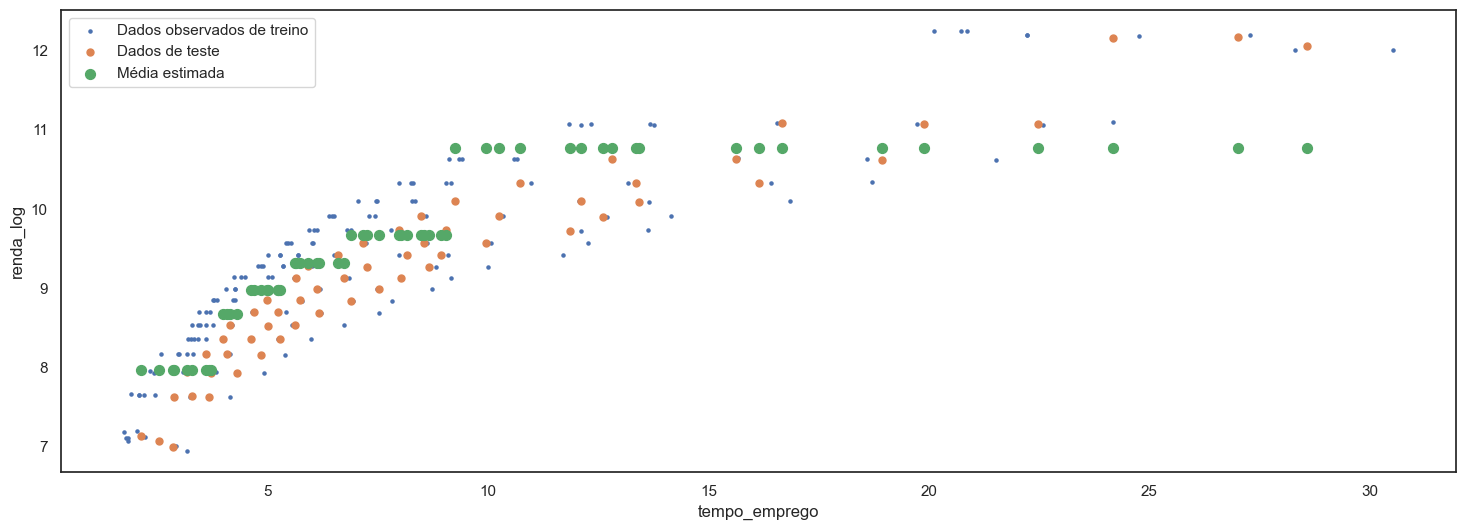

In [63]:
# Categorizando a variável 'tempo_emprego' nos conjuntos de treinamento e teste usando os mesmos bins (q) definidos anteriormente
df_train_['tempo_emprego_cat'] = pd.cut(x=df_train_.tempo_emprego, bins=q)
df_test_['tempo_emprego_cat'] = pd.cut(x=df_test_.tempo_emprego, bins=q)

# Ajustando um modelo de regressão linear (cat_model) usando a variável 'tempo_emprego_cat' como preditora da variável 'renda_log' nos dados de treinamento
cat_model = smf.ols(formula='renda_log ~ tempo_emprego_cat', data=df_train_).fit()

# Imprimindo o R-quadrado ajustado do modelo e o R-quadrado estimado nos dados de teste
print(f'''CATEGORIZAÇÃO
R-quadrado ajustado do modelo: {cat_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=cat_model.predict(df_test_)):.2%}
''')

# Criando uma função para plotar os resultados de um modelo de regressão com a base de testes
def plotar_resultados_teste(modelo: sm.regression.linear_model.RegressionResultsWrapper) -> None:
    """
    Plota os dados observados de treinamento, os dados de teste e a média estimada pelo modelo.

    Parâmetros:
        modelo (sm.regression.linear_model.RegressionResultsWrapper): Modelo de regressão.

    Retorna:
        None
    """
    # Criação do gráfico para exibir os dados observados de treinamento, os dados de teste e a média estimada pelo modelo
    plt.figure(figsize=(18,6))
    plt.scatter(df_train_.tempo_emprego, df_train_.renda_log, s=5, label='Dados observados de treino')
    plt.scatter(df_test_.tempo_emprego, df_test_.renda_log, s=25, label='Dados de teste')
    plt.scatter(df_test_.tempo_emprego, modelo.predict(df_test_), s=50, label='Média estimada')
    plt.xlabel(xlabel='tempo_emprego')
    plt.ylabel(ylabel='renda_log')
    plt.legend(loc=2)
    plt.show()
    
# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (cat_model) na base de teste
plotar_resultados_teste(modelo=cat_model)

**TRANSFORMAÇÃO SOBRE X**

TRANSFORMAÇÃO SOBRE X
R-quadrado ajustado do modelo: 83.14%
R-quadrado com dados de teste: 87.26%



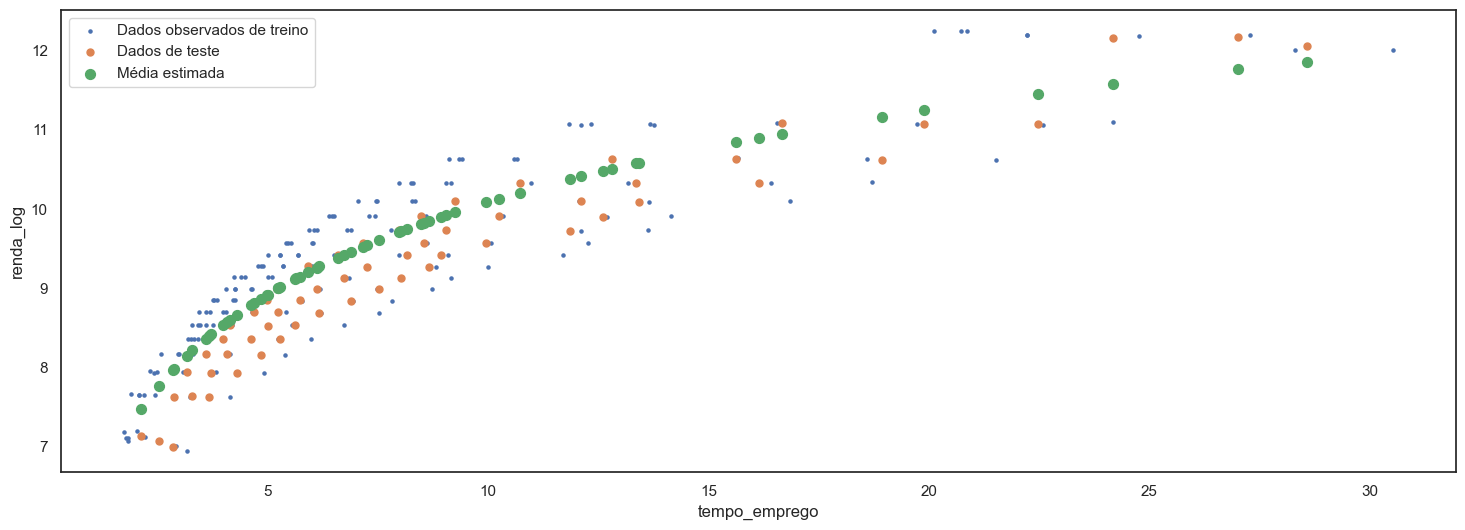

In [64]:
# Ajustando um modelo de regressão linear (transform_model) usando a variável 'tempo_emprego' transformada por meio de uma função logarítmica como preditora da variável 'renda_log' nos dados de treinamento
transform_model = smf.ols(formula='renda_log ~ I(np.log(tempo_emprego))', data=df_train_).fit()

# Calculando o R-quadrado ajustado do modelo e o R-quadrado estimado nos dados de teste
r2 = r2_score(y_true=df_test_.renda_log, y_pred=transform_model.predict(df_test_))
print(f'''TRANSFORMAÇÃO SOBRE X
R-quadrado ajustado do modelo: {transform_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2:.2%}
''')

# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (transform_model) na base de teste
plotar_resultados_teste(modelo=transform_model)

**REGRESSÃO SEGMENTADA**

REGRESSÃO SEGMENTADA
R-quadrado ajustado do modelo: 82.38%
R-quadrado com dados de teste: 87.92%



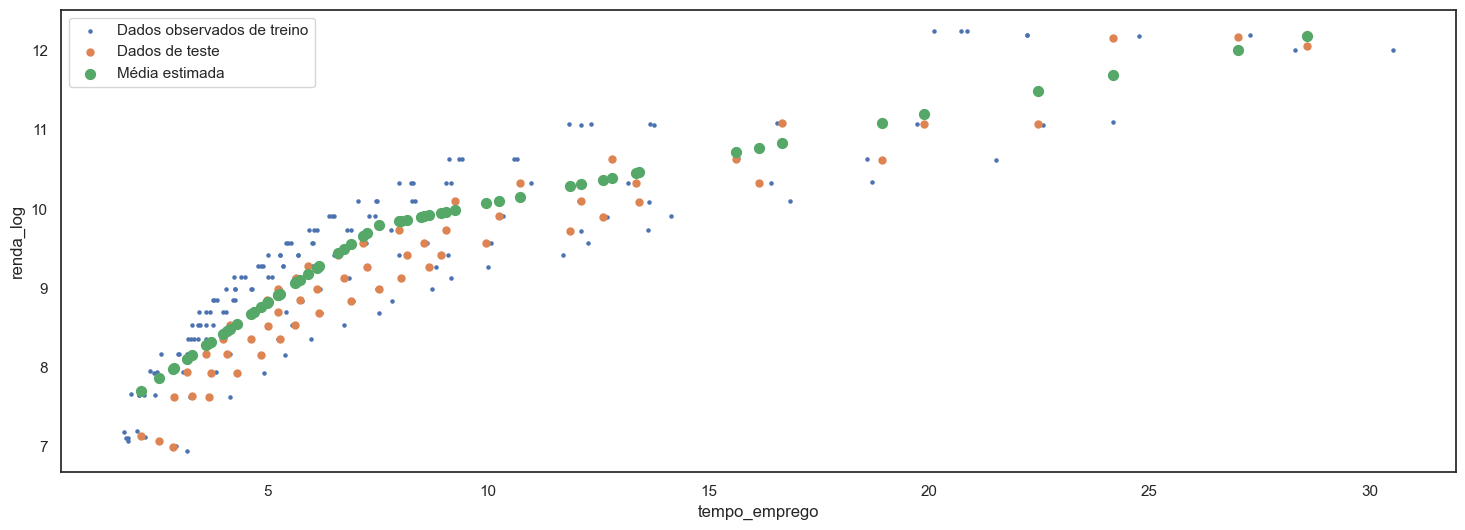

In [65]:
# Definindo o ponto de corte para segmentar a variável 'tempo_emprego'
C1 = 7.5

# Segmentando a variável 'tempo_emprego' nos conjuntos de treinamento e teste e criando variáveis indicadoras 'X_1' e 'X_2'
df_train_['X_1'] = (df_train_['tempo_emprego'] <= C1) * df_train_['tempo_emprego'] + (df_train_['tempo_emprego'] >  C1) * C1
df_train_['X_2'] = (df_train_['tempo_emprego'] >  C1) * df_train_['tempo_emprego'] + (df_train_['tempo_emprego'] <= C1) * C1

df_test_['X_1'] = (df_test_['tempo_emprego'] <= C1) * df_test_['tempo_emprego'] + (df_test_['tempo_emprego'] >  C1) * C1
df_test_['X_2'] = (df_test_['tempo_emprego'] >  C1) * df_test_['tempo_emprego'] + (df_test_['tempo_emprego'] <= C1) * C1

# Ajustando um modelo de regressão linear (segmented_model) usando as variáveis indicadoras 'X_1' e 'X_2' como preditoras da variável 'renda_log' nos dados de treinamento
segmented_model = smf.ols(formula='renda_log ~ X_1 + X_2', data=df_train_).fit()

# Calculando o R-quadrado ajustado do modelo e o R-quadrado estimado nos dados de teste
print(f'''REGRESSÃO SEGMENTADA
R-quadrado ajustado do modelo: {segmented_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=segmented_model.predict(df_test_)):.2%}
''')

# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (segmented_model) na base de teste
plotar_resultados_teste(modelo=segmented_model)

**LOWESS**

LOWESS
R-quadrado ajustado do modelo: 83.40%
R-quadrado com dados de teste: 88.26%



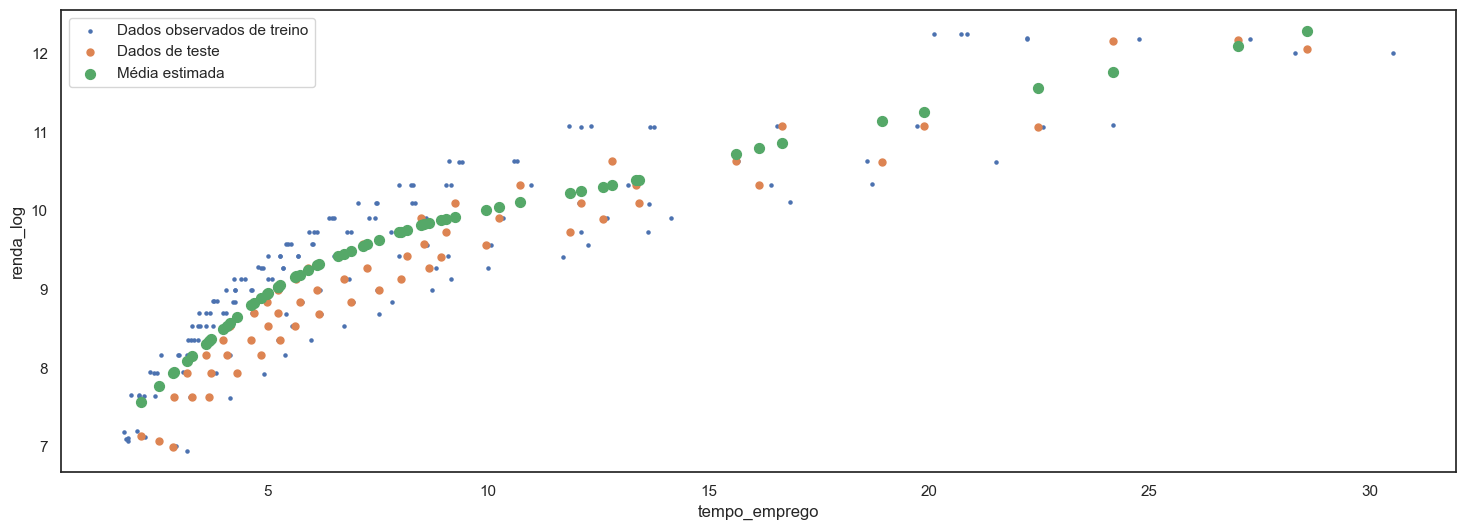

In [66]:
# Calculando LOWESS para os dados de treinamento
lowess_ = sm.nonparametric.lowess(endog=df_train_.renda_log, exog=df_train_.tempo_emprego, frac=2/3)

# Interpolando os valores suavizados para estimar 'renda_log' com base em 'tempo_emprego'
f_ = interp1d(x=lowess_[:,0], y=lowess_[:,1], bounds_error=False)

# Criando uma nova coluna 'lowess' nos conjuntos de treinamento e teste
df_train_['lowess'] = f_(df_train_.tempo_emprego)
df_test_['lowess'] = f_(df_test_.tempo_emprego)

# Ajustando um modelo de regressão linear (lowess_model) usando 'lowess' como preditora de 'renda_log' nos dados de treinamento
lowess_model = smf.ols(formula='renda_log ~ lowess', data=df_train_).fit()

# Calculando o R-quadrado ajustado do modelo e o R-quadrado estimado nos dados de teste
print(f'''LOWESS
R-quadrado ajustado do modelo: {lowess_model.rsquared_adj:.2%}
R-quadrado com dados de teste: {r2_score(y_true=df_test_.renda_log, y_pred=lowess_model.predict(df_test_)):.2%}
''')

# Chamando a função para exibir o gráfico com os resultados do modelo de regressão linear (lowess_model) na base de teste
plotar_resultados_teste(modelo=lowess_model)